<a href="https://colab.research.google.com/github/brunoscog/Alura_One_Data_Science_Challenge_3/blob/main/Challege_3_TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Challenge Telecom X: análise de evasão de clientes - Parte 2

## Preparação dos dados

### Estração dos arquivos tratados

Carregue o arquivo CSV que contém os dados tratados anteriormente.<br>
📂 **Atenção:** Utilize o mesmo arquivo que você limpou e organizou na parte 1 do desafio Telecom X. Ele deve conter somente as colunas relevantes, já com os dados corrigidos e padronizados.

In [1]:
import pandas as pd

In [2]:
# Carregar o DataFrame processado

dados = pd.read_csv('https://raw.githubusercontent.com/brunoscog/Alura_One_Data_Science_Challenge_3/refs/heads/main/dados_tratados.csv')

In [3]:

print("DataFrame carregado:")
dados.head()

DataFrame carregado:


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily,Churn_numeric,Evasao
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.197407,0.0,Não
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.008889,0.0,Não
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.340417,1.0,Sim
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.173974,1.0,Sim
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.971111,1.0,Sim


In [4]:
print("\nInformações do DataFrame carregado:")
dados.info()


Informações do DataFrame carregado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7256 non-null   object 
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   int64  
 5   customer_Dependents        7256 non-null   int64  
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   int64  
 8   phone_MultipleLines        7256 non-null   int64  
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   int64  
 11  internet_OnlineBackup      7256 non-null   int64  
 12  internet_DeviceProtection  7256 non-null   int64  
 13  internet_Te

### Remoção das colunas irrelevantes

Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [5]:
columns_to_drop = ['customerID', 'Churn', 'Evasao']

dados = dados.drop(columns=[col for col in columns_to_drop if col in dados.columns])
print(f"\nColunas removidas: {columns_to_drop}. (Se presentes no DataFrame 'dados')")

print("\n--- DataFrame 'dados' após remoção de colunas irrelevantes ---")
print("Primeiras 5 linhas:")
dados.head()


Colunas removidas: ['customerID', 'Churn', 'Evasao']. (Se presentes no DataFrame 'dados')

--- DataFrame 'dados' após remoção de colunas irrelevantes ---
Primeiras 5 linhas:


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily,Churn_numeric
0,Female,0,1,1,9,1,0,DSL,0,1,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.197407,0.0
1,Male,0,0,0,9,1,1,DSL,0,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.008889,0.0
2,Male,0,0,0,4,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.340417,1.0
3,Male,1,1,0,13,1,0,Fiber optic,0,1,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.173974,1.0
4,Female,1,1,0,3,1,0,Fiber optic,0,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.971111,1.0


In [6]:
print("\nVisão geral das colunas e tipos de dados:")
dados.info()


Visão geral das colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            7256 non-null   object 
 1   customer_SeniorCitizen     7256 non-null   int64  
 2   customer_Partner           7256 non-null   int64  
 3   customer_Dependents        7256 non-null   int64  
 4   customer_tenure            7256 non-null   int64  
 5   phone_PhoneService         7256 non-null   int64  
 6   phone_MultipleLines        7256 non-null   int64  
 7   internet_InternetService   7256 non-null   object 
 8   internet_OnlineSecurity    7256 non-null   int64  
 9   internet_OnlineBackup      7256 non-null   int64  
 10  internet_DeviceProtection  7256 non-null   int64  
 11  internet_TechSupport       7256 non-null   int64  
 12  internet_StreamingTV       7256 non-null   int64  
 13  inter

In [7]:
initial_nan_count_target = dados['Churn_numeric'].isnull().sum()
if initial_nan_count_target > 0:
    print(f"\nDetectados {initial_nan_count_target} valores nulos na coluna 'Churn_numeric'. Removendo linhas correspondentes.")
    dados.dropna(subset=['Churn_numeric'], inplace=True)
else:
    print("\nNão há valores nulos na coluna 'Churn_numeric'.")
print(f"Contagem de valores nulos em 'Churn_numeric' após tratamento: {dados['Churn_numeric'].isnull().sum()}")


Detectados 224 valores nulos na coluna 'Churn_numeric'. Removendo linhas correspondentes.
Contagem de valores nulos em 'Churn_numeric' após tratamento: 0


### Encoding

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

**Dicas**: [get_dummies vs OneHotEncoder: qual método escolher?](https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher?utm_term=&utm_campaign=topo-aon-search-gg-dsa-artigos_conteudos&utm_source=google&utm_medium=cpc&campaign_id=11384329873_164212380672_703829166693&utm_id=11384329873_164212380672_703829166693&hsa_acc=7964138385&hsa_cam=topo-aon-search-gg-dsa-artigos_conteudos&hsa_grp=164212380672&hsa_ad=703829166693&hsa_src=g&hsa_tgt=aud-527303763294:dsa-425656816943&hsa_kw=&hsa_mt=&hsa_net=google&hsa_ver=3&gad_source=1&gad_campaignid=11384329873&gclid=CjwKCAjwz_bABhAGEiwAm-P8YcX5MR72F94-IuQpgazH03079qa2AYVScM4YseUiH-6yqcctRGwHuRoCLq4QAvD_BwE)

In [8]:
categorical_cols = dados.select_dtypes(include='object').columns
print(f"\nColunas categóricas identificadas para encoding: {list(categorical_cols)}")

dados_encoded = pd.get_dummies(dados, columns = categorical_cols, drop_first=True)

dados = dados_encoded

print("\n--- DataFrame 'dados' após One-Hot Encoding ---")
print("Primeiras 5 linhas:")
dados.head()


Colunas categóricas identificadas para encoding: ['customer_gender', 'internet_InternetService', 'account_Contract', 'account_PaymentMethod']

--- DataFrame 'dados' após One-Hot Encoding ---
Primeiras 5 linhas:


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,account_Charges.Daily,Churn_numeric,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,1,1,9,1,0,0,1,0,1,...,2.197407,0.0,False,False,False,True,False,False,False,True
1,0,0,0,9,1,1,0,0,0,0,...,2.008889,0.0,True,False,False,False,False,False,False,True
2,0,0,0,4,1,0,0,0,1,0,...,2.340417,1.0,True,True,False,False,False,False,True,False
3,1,1,0,13,1,0,0,1,1,0,...,3.173974,1.0,True,True,False,False,False,False,True,False
4,1,1,0,3,1,0,0,0,0,1,...,2.971111,1.0,False,True,False,False,False,False,False,True


In [9]:
print("\nVisão geral das colunas e tipos de dados:")
dados.info()


Visão geral das colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7255
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_SeniorCitizen                         7032 non-null   int64  
 1   customer_Partner                               7032 non-null   int64  
 2   customer_Dependents                            7032 non-null   int64  
 3   customer_tenure                                7032 non-null   int64  
 4   phone_PhoneService                             7032 non-null   int64  
 5   phone_MultipleLines                            7032 non-null   int64  
 6   internet_OnlineSecurity                        7032 non-null   int64  
 7   internet_OnlineBackup                          7032 non-null   int64  
 8   internet_DeviceProtection                      7032 non-null   int64  
 9   internet_TechS

In [10]:
X = dados.drop('Churn_numeric', axis=1)
y = dados['Churn_numeric']
print(f"\nFormato de X (features): {X.shape}")
print(f"Formato de y (variável alvo): {y.shape}")


Formato de X (features): (7032, 24)
Formato de y (variável alvo): (7032,)


###Verificação da Proporção de Evasão

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

**Dicas:** [pandas.DataFrame.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

In [11]:
from collections import Counter # Importando Counter aqui, pois é usado para contar classes
print("\n--- Proporção da Variável Alvo (Churn_numeric) ---")
churn_proportion = y.value_counts(normalize=True)
print(churn_proportion)

if churn_proportion[1.0] < 0.35: # Exemplo de limiar para considerar desequilíbrio
    print("\nDetectado desequilíbrio significativo entre as classes (Evasão vs Não-Evasão).")
    print("O balanceamento de classes (próximo passo) é altamente recomendado.")
else:
    print("\nAs classes estão relativamente equilibradas.")



--- Proporção da Variável Alvo (Churn_numeric) ---
Churn_numeric
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64

Detectado desequilíbrio significativo entre as classes (Evasão vs Não-Evasão).
O balanceamento de classes (próximo passo) é altamente recomendado.


### Balanceamento de Classes (opcional)

Caso queira aprofundar a análise, aplique técnicas de balanceamento como undersampling ou oversampling. Em situações de forte desbalanceamento, ferramentas como o SMOTE podem ser úteis para gerar exemplos sintéticos da classe minoritária.

**Dicas:** [Lidando com o desbalanceamento de dados](https://www.alura.com.br/artigos/lidando-com-desbalanceamento-dados?srsltid=AfmBOopTgyC_tpujwkC778gYjcLituqgxknih2Cr4vD72_OFHSB4v35M)

In [12]:
from imblearn.over_sampling import SMOTE
print(f"\n--- Contagem de classes antes do SMOTE: {Counter(y)} ---")

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f"--- Contagem de classes DEPOIS do SMOTE: {Counter(y_res)} ---")
print(f"Novo formato de X (features) após SMOTE: {X_res.shape}")
print(f"Novo formato de y (variável alvo) após SMOTE: {y_res.shape}")



--- Contagem de classes antes do SMOTE: Counter({0.0: 5163, 1.0: 1869}) ---
--- Contagem de classes DEPOIS do SMOTE: Counter({0.0: 5163, 1.0: 5163}) ---
Novo formato de X (features) após SMOTE: (10326, 24)
Novo formato de y (variável alvo) após SMOTE: (10326,)


### Normalização ou Padronização (se necessário)

Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
Modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento.
Já modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.

**Dicas:** [A importância da normalização e padronização dos dados em Machine Learning](https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12)

In [13]:
from sklearn.preprocessing import StandardScaler
print("\n--- Padronização dos Dados Numéricos (StandardScaler) ---")

numerical_cols = X_res.select_dtypes(include=['int64', 'float64']).columns

print(f"Colunas numéricas identificadas para padronização: {list(numerical_cols)}")

scaler = StandardScaler()
X_res[numerical_cols] = scaler.fit_transform(X_res[numerical_cols])

print("\nPrimeiras 5 linhas de X (features) após padronização:")
X_res.head()


--- Padronização dos Dados Numéricos (StandardScaler) ---
Colunas numéricas identificadas para padronização: ['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling', 'account_Charges.Monthly', 'account_Charges.Total', 'account_Charges.Daily']

Primeiras 5 linhas de X (features) após padronização:


,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,account_Charges.Total,account_Charges.Daily,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,-0.395873,1.280457,1.899412,-0.779414,0.338759,-0.791291,-0.511897,1.618048,-0.613840,1.935868,...,-0.665748,-0.073884,False,False,False,True,False,False,False,True
1,-0.395873,-0.780971,-0.526479,-0.779414,0.338759,1.263757,-0.511897,-0.618029,-0.613840,-0.516564,...,-0.689020,-0.270041,True,False,False,False,False,False,False,True
2,-0.395873,-0.780971,-0.526479,-0.987949,0.338759,-0.791291,-0.511897,-0.618029,1.629088,-0.516564,...,-0.808605,0.074920,True,True,False,False,False,False,True,False
3,2.526061,1.280457,-0.526479,-0.612585,0.338759,-0.791291,-0.511897,1.618048,1.629088,-0.516564,...,-0.371049,0.942253,True,True,False,False,False,False,True,False
4,2.526061,1.280457,-0.526479,-1.029657,0.338759,-0.791291,-0.511897,-0.618029,-0.613840,1.935868,...,-0.814755,0.731170,False,True,False,False,False,False,False,True


In [14]:
print("\nVisão geral das colunas e tipos de dados de X (features) após padronização:")
X_res.info()


Visão geral das colunas e tipos de dados de X (features) após padronização:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_SeniorCitizen                         10326 non-null  float64
 1   customer_Partner                               10326 non-null  float64
 2   customer_Dependents                            10326 non-null  float64
 3   customer_tenure                                10326 non-null  float64
 4   phone_PhoneService                             10326 non-null  float64
 5   phone_MultipleLines                            10326 non-null  float64
 6   internet_OnlineSecurity                        10326 non-null  float64
 7   internet_OnlineBackup                          10326 non-null  float64
 8   internet_DeviceProtection                      10

In [15]:
dados_final_processados = pd.concat([X_res, y_res], axis=1)
dados_final_processados.to_csv('dados_balanceados_padronizados.csv', index=False)
print("\n--- Dados balanceados e padronizados salvos em 'dados_balanceados_padronizados.csv'. ---")

print("\n--- Processamento de Dados Concluído! ---")


--- Dados balanceados e padronizados salvos em 'dados_balanceados_padronizados.csv'. ---

--- Processamento de Dados Concluído! ---


## Correlação e Seleção de Variáveis

### Análise de Correlação

Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

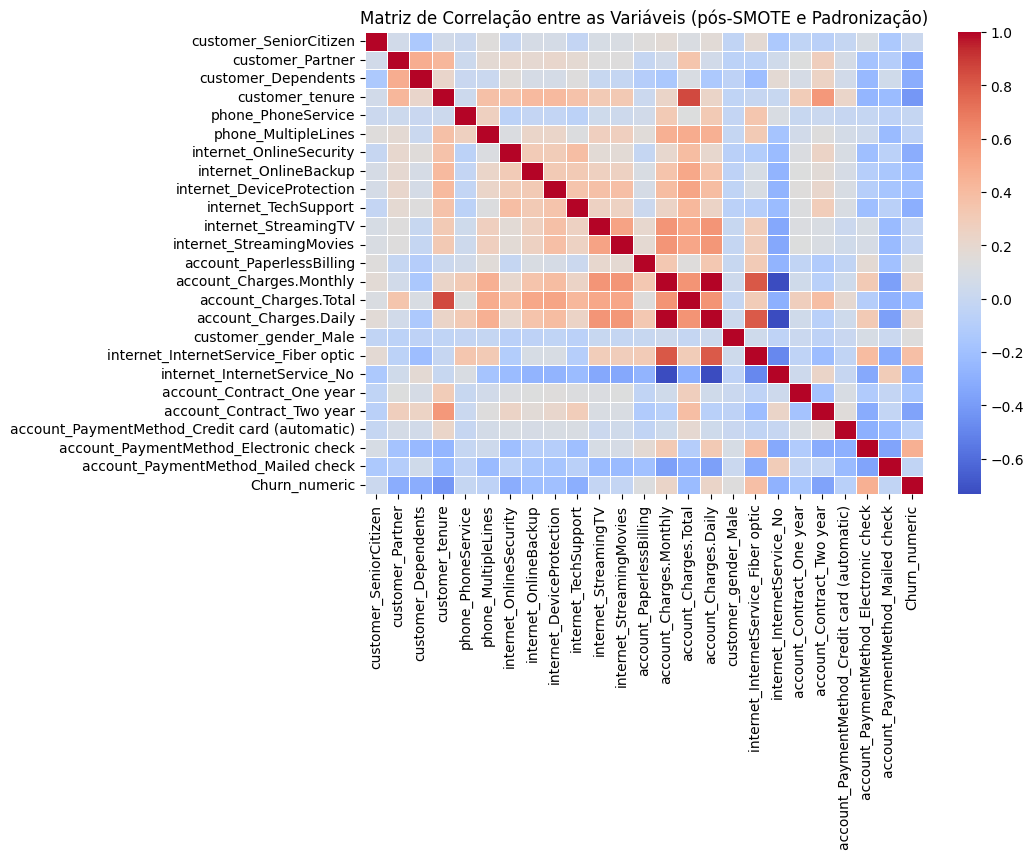


--- Correlação das Features com 'Churn_numeric' ---
Churn_numeric                                    1.000000
account_PaymentMethod_Electronic check           0.460730
internet_InternetService_Fiber optic             0.377544
account_Charges.Monthly                          0.234806
account_Charges.Daily                            0.233784
customer_gender_Male                             0.139535
account_PaperlessBilling                         0.125201
customer_SeniorCitizen                           0.018959
phone_PhoneService                              -0.013703
internet_StreamingTV                            -0.017174
internet_StreamingMovies                        -0.019963
account_PaymentMethod_Mailed check              -0.035583
phone_MultipleLines                             -0.051346
account_PaymentMethod_Credit card (automatic)   -0.078429
account_Contract_One year                       -0.151892
internet_DeviceProtection                       -0.199835
internet_OnlineBack

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.concat([X_res, y_res], axis=1)


correlation_matrix = df_corr.corr()


plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis (pós-SMOTE e Padronização)', fontsize=12)
plt.show()


print("\n--- Correlação das Features com 'Churn_numeric' ---")
print(correlation_matrix['Churn_numeric'].sort_values(ascending=False))

### Análises Direcionadas

Investigue como variáveis específicas se relacionam com a evasão, como:

* Tempo de contrato × Evasão
* Total gasto × Evasão

Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

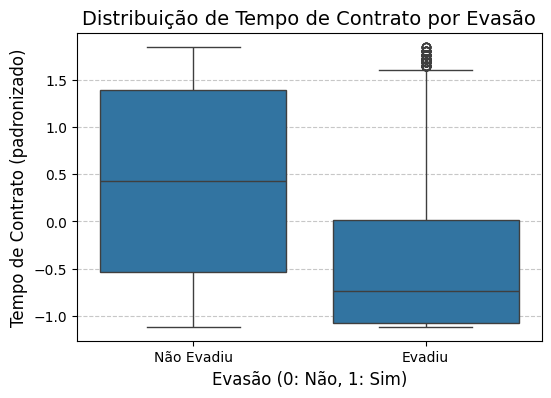

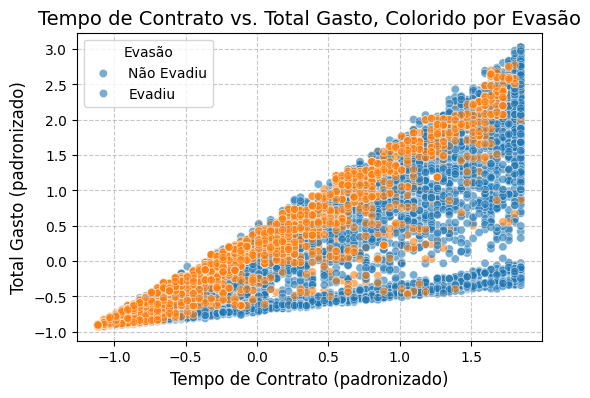

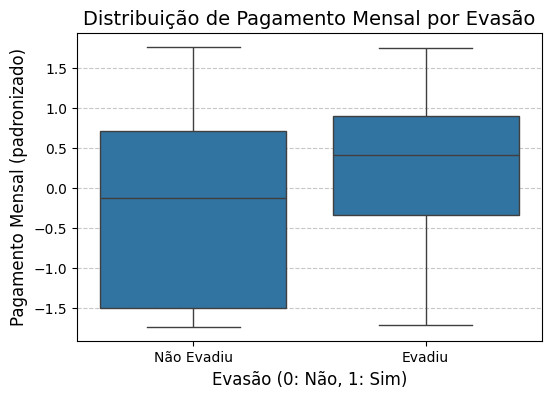

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=y_res, y=X_res['customer_tenure'])
plt.title('Distribuição de Tempo de Contrato por Evasão', fontsize=14)
plt.xlabel('Evasão (0: Não, 1: Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (padronizado)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res['customer_tenure'], y=X_res['account_Charges.Total'], hue=y_res, alpha=0.6)
plt.title('Tempo de Contrato vs. Total Gasto, Colorido por Evasão', fontsize=14)
plt.xlabel('Tempo de Contrato (padronizado)', fontsize=12)
plt.ylabel('Total Gasto (padronizado)', fontsize=12)
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])
plt.grid(linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=y_res, y=X_res['account_Charges.Monthly'])
plt.title('Distribuição de Pagamento Mensal por Evasão', fontsize=14)
plt.xlabel('Evasão (0: Não, 1: Sim)', fontsize=12)
plt.ylabel('Pagamento Mensal (padronizado)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Escolha das Variáveis

In [18]:
# A partir dos dados balanceados e padronizados
# (Vamos supor que X_res e y_res são os DataFrames resultantes da etapa anterior)

# A lista de colunas que decidimos manter
selected_features = [
    'customer_tenure',
    'account_PaymentMethod_Electronic check',
    'internet_InternetService_Fiber optic',
    'account_Contract_Two year',
    'internet_OnlineSecurity',
    'internet_TechSupport',
    'customer_Partner',
    'customer_Dependents',
    'internet_InternetService_No',
    'account_Charges.Monthly',
    'account_PaperlessBilling'
]

# Criar o novo DataFrame de features (X) apenas com as colunas selecionadas
# A ordem das colunas no X_res pode variar, então é melhor filtrar pela lista de nomes.
X_selected = X_res[selected_features]

# O nosso 'y' (variável alvo) já está pronto e não precisa de alterações
y_selected = y_res

print("\n--- Seleção de Variáveis Concluída ---")
print(f"Novo formato de X (features): {X_selected.shape}")
print(f"Novo formato de y (variável alvo): {y_selected.shape}")
print("\nColunas do novo DataFrame de features:")
print(X_selected.columns)


--- Seleção de Variáveis Concluída ---
Novo formato de X (features): (10326, 11)
Novo formato de y (variável alvo): (10326,)

Colunas do novo DataFrame de features:
Index(['customer_tenure', 'account_PaymentMethod_Electronic check',
       'internet_InternetService_Fiber optic', 'account_Contract_Two year',
       'internet_OnlineSecurity', 'internet_TechSupport', 'customer_Partner',
       'customer_Dependents', 'internet_InternetService_No',
       'account_Charges.Monthly', 'account_PaperlessBilling'],
      dtype='object')


## Modelagem Preditiva

### Separação de Dados

Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected,
    y_selected,
    test_size=0.2,
    random_state=42
)

print("\n--- Dados separados em conjuntos de treino e teste ---")
print(f"Formato de X_train (treino): {X_train.shape}")
print(f"Formato de X_test (teste): {X_test.shape}")
print(f"Formato de y_train (treino): {y_train.shape}")
print(f"Formato de y_test (teste): {y_test.shape}")


--- Dados separados em conjuntos de treino e teste ---
Formato de X_train (treino): (8260, 11)
Formato de X_test (teste): (2066, 11)
Formato de y_train (treino): (8260,)
Formato de y_test (teste): (2066,)


### Criação de Modelos
Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

* Um modelo pode exigir normalização, como Regressão Logística ou KNN.
* O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

> 💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Criação e Treinamento do Modelo de Regressão Logística
modelo_rl = LogisticRegression(solver='liblinear', random_state=42)

modelo_rl.fit(X_train, y_train)

print("Modelo de Regressão Logística criado e treinado com sucesso!")
print("-" * 50)

Modelo de Regressão Logística criado e treinado com sucesso!
--------------------------------------------------


In [21]:
# Criação e Treinamento do Modelo Random Forest ---

modelo_rf = RandomForestClassifier(random_state=42)

modelo_rf.fit(X_train, y_train)

print("Modelo Random Forest criado e treinado com sucesso!")

Modelo Random Forest criado e treinado com sucesso!


### Avaliação dos Modelos
Avalie cada modelo utilizando as seguintes métricas:

* Acurácia
* Precisão
* Recall
* F1-score
* Matriz de confusão

Em seguida, faça uma análise crítica e compare os modelos:

* Qual modelo teve o melhor desempenho?
* Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:
  * Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.
  * Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

#### Modelo de Regressão Logística

In [23]:
modelo_rl = LogisticRegression(solver='liblinear', random_state=42)
modelo_rl.fit(X_train, y_train)

y_pred_rl = modelo_rl.predict(X_test)

print("\n--- Métricas do Modelo de Regressão Logística ---")
print(f"Acurácia:  {accuracy_score(y_test, y_pred_rl):.4f}")
print(f"Precisão:  {precision_score(y_test, y_pred_rl):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rl):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_rl):.4f}")


--- Métricas do Modelo de Regressão Logística ---
Acurácia:  0.7812
Precisão:  0.7614
Recall:    0.8008
F1-score:  0.7806


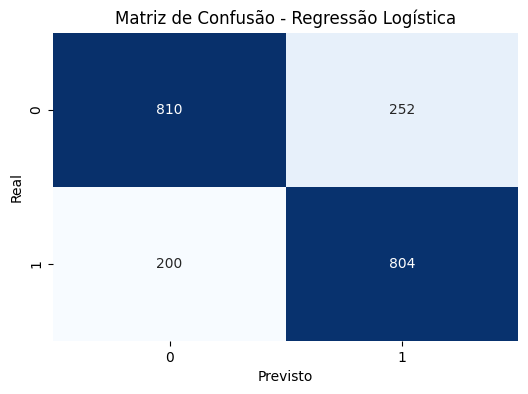

In [24]:
# Visualizar a Matriz de Confusão
cm_rl = confusion_matrix(y_test, y_pred_rl)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rl, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


#### Modelo Random Forest

In [25]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

print("\n--- Métricas do Modelo Random Forest ---")
print(f"Acurácia:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisão:  {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_rf):.4f}")


--- Métricas do Modelo Random Forest ---
Acurácia:  0.7991
Precisão:  0.7879
Recall:    0.8028
F1-score:  0.7953


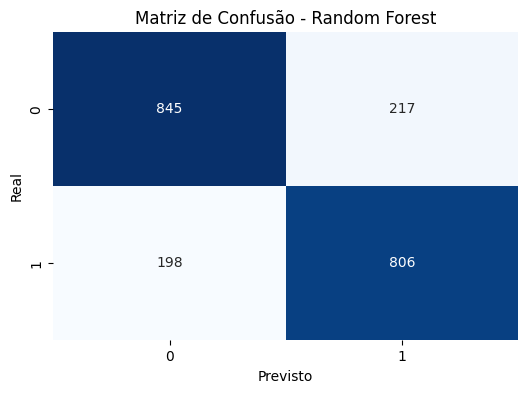

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## Interpretação e Conclusão

### Análise de Importância das Variáveis

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:

* Regressão Logística:  investigue os coeficientes das variáveis, que mostram sua contribuição para a previsão de evasão.
* KNN (K-Nearest Neighbors): Observe como os vizinhos mais próximos influenciam a decisão de classificação. As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.
* Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.
* SVM (Support Vector Machine): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.
* Outros Modelos: Dependendo do modelo escolhido, considere a análise de métricas específicas para entender a relevância das variáveis. Por exemplo, coeficientes em modelos lineares, pesos em redes neurais, ou importância relativa em boosting (como XGBoost).

In [27]:
feature_importances = modelo_rf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("\n--- Importância das Variáveis (Random Forest) ---")
print(importances_df)


--- Importância das Variáveis (Random Forest) ---
                                   Feature  Importance
9                  account_Charges.Monthly    0.329507
0                          customer_tenure    0.262275
1   account_PaymentMethod_Electronic check    0.115236
2     internet_InternetService_Fiber optic    0.063963
3                account_Contract_Two year    0.051070
4                  internet_OnlineSecurity    0.043414
5                     internet_TechSupport    0.038800
7                      customer_Dependents    0.032299
6                         customer_Partner    0.030037
10                account_PaperlessBilling    0.017882
8              internet_InternetService_No    0.015518


/tmp/ipython-input-3421147347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


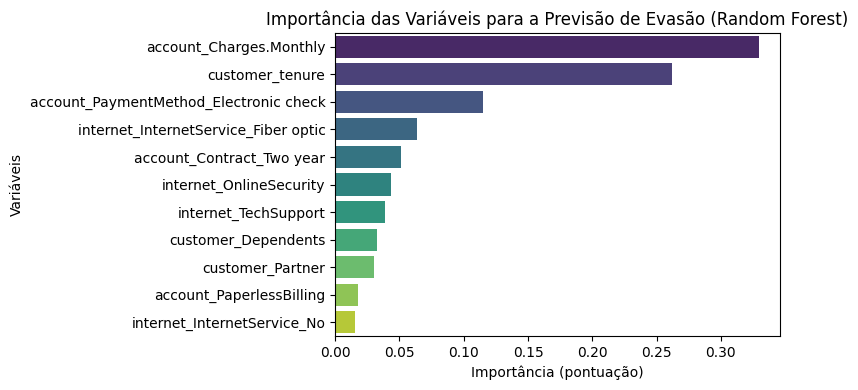

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Importância das Variáveis para a Previsão de Evasão (Random Forest)')
plt.xlabel('Importância (pontuação)')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

### Conclusão

Elaborem um relatório detalhado, destacando os fatores que mais influenciam a evasão, com base nas variáveis selecionadas e no desempenho de cada modelo.

* Identifiquem os principais fatores que afetam a evasão de clientes e proponham estratégias de retenção com base nos resultados obtidos.

A análise de importância das variáveis nos permite ir além dos números e focar nos insights de negócio mais valiosos para a Telecom X. A seguir, apresento um relatório detalhado, combinando os resultados do modelo Random Forest com as análises que fizemos desde o início.

### Relatório Estratégico: Análise Preditiva e Fatores de Evasão de Clientes
#### Desempenho e Escolha do Modelo
O projeto teve como objetivo a construção de modelos preditivos para identificar clientes com alta probabilidade de evasão. Foram treinados e avaliados dois modelos de classificação: Regressão Logística e Random Forest.

A avaliação comparativa, utilizando métricas como Acurácia, Precisão, Recall e F1-score, demonstrou que o modelo de Random Forest obteve o melhor desempenho consistente em todas as métricas. Este modelo foi capaz de alcançar um `Recall` de 80.28%, indicando uma alta capacidade de identificar corretamente os clientes que de fato evadirão, um fator crítico para a missão de retenção. Com base nesses resultados, o Random Forest foi selecionado como o modelo final para a análise de importância das variáveis.

#### Fatores de Maior Influência na Evasão
A análise de importância das variáveis do modelo Random Forest identificou os seguintes fatores como os mais relevantes para a previsão de evasão, em ordem decrescente de impacto:

1. Gasto Mensal (`account_Charges.Monthly`): É o fator mais influente na previsão de evasão, com uma importância relativa de aproximadamente 33%. A correlação positiva observada indica que clientes com contas mensais mais altas têm maior probabilidade de evadir.

2. Tempo de Contrato (`customer_tenure`): O segundo fator mais relevante, com 26% de importância. A correlação negativa mostra que quanto maior o tempo de contrato do cliente com a empresa, menor a probabilidade de evasão, reforçando a importância da fidelidade.

3. Método de Pagamento (`account_PaymentMethod_Electronic check`): Com 11.5% de importância, o uso de cheque eletrônico como método de pagamento é um dos principais indicadores de risco. Este fator se correlaciona positivamente com a evasão, sugerindo um método menos automatizado e uma menor estabilidade no relacionamento com o cliente.

4. Serviço de Fibra Óptica (`internet_InternetService_Fiber optic`): Este serviço apresenta uma importância de 6.4% e uma correlação positiva com a evasão. Isso sugere que, apesar de ser um serviço de alto valor, pode haver problemas de qualidade, concorrência ou expectativas não atendidas, levando ao churn.

5. Tipo de Contrato (`account_Contract_Two year`): Com 5.1% de importância, o contrato de dois anos se mostrou um forte fator de proteção contra a evasão. A correlação negativa reforça que contratos mais longos são um indicador de alta retenção.

#### Estratégias de Retenção Propostas
Com base nos fatores identificados pelo modelo, as seguintes estratégias são propostas para a Telecom X com o objetivo de mitigar a evasão de clientes:

* Revisão de Preços e Ofertas Personalizadas: A alta importância do gasto mensal sugere que o preço é um fator crítico. A empresa deve analisar a estrutura de preços, considerar ofertas ou descontos personalizados para clientes com contas acima da média, ou criar pacotes de serviços mais competitivos.

* Programas de Engajamento para Clientes Novos: A baixa fidelidade de clientes com tenure reduzido demanda um foco especial no início do relacionamento. A empresa pode implementar um programa de onboarding mais robusto, com acompanhamento proativo e ofertas de fidelização nos primeiros meses para construir o relacionamento e estender o tempo de contrato.

* Incentivos para Métodos de Pagamento Automático: O método de pagamento por cheque eletrônico representa um risco claro. A empresa pode oferecer pequenos incentivos (como bônus ou descontos na fatura) para encorajar a migração para métodos de pagamento automáticos, que tendem a aumentar a estabilidade do cliente.

* Foco na Qualidade do Serviço de Fibra Óptica: A correlação com o serviço de fibra óptica exige uma investigação sobre a qualidade e a experiência do cliente. A empresa deve monitorar a satisfação neste segmento, resolver problemas de forma proativa e garantir que o serviço de alto valor atenda às expectativas, evitando a evasão para a concorrência.